### Task Description: 
Understanding user behavior and engagement with the product. Below, you have been provided with a dataset containing user activity data. Your task is to analyze this data and provide actionable insights and recommendations to improve user growth and engagement. Understanding user behavior and engagement is crucial for driving growth and improving the product. In this task, you will be working with datasets that contain event logs and app open data for a specified period. Your task is therefore divided into two parts:


#### Part 1 : SQL

1. Write a SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.

2. Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th
3. Write a SQL query to calculate the user’s daily retention rate for a 7-day period. Calculate both Sticky and Cohorted Retention

#### Part 2 : User Activity Analysis
Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts. Expected output: A memo in a form of Google doc that describes the finding and outlines action items. Additional attachments (spreadsheets, Jupyter notebooks, etc.) only if it is necessary

## Data Understanding and cleaning

#### App Open 
______________________________________________________

| Column        | Data Type         | Description                               | Unique Key|
| ----------- | ----------- | ----------- | ----------- |
| timestamp     |TIMESTAMP          |Timestamp when the app was opened          |No|
| device_skey   |STRING             |Unique identifier for the device           |No|
| session_skey  |STRING             |Unique identifier for the session          |No|
| user_skey     |STRING             |Unique identifier for the users            |No|
| is_first_app_open |BOOLEAN        |Indicator of whether it's the first time app open for the user |No|
| platform      |STRING             |Platform on which the app was opened (e.g., android, apple) |No|
| country_code  |STRING             |Country from which the app was opened (e.g., us, de) |No|

In [ ]:
apps_open = _deepnote_execute_sql('SELECT \n    timestamp AS date_time\n    , device_skey::VARCHAR AS device_skey\n    , session_skey::VARCHAR AS session_skey\n    , user_skey::VARCHAR AS user_skey\n    , is_first_app_open::BOOLEAN AS is_first_app_open\n    , platform::VARCHAR AS platform\n    , country_code::VARCHAR AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/App Opens.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
apps_open

date_time           device_skey          session_skey  \
0      2023-11-08 02:07:19.673   7891415701568881512   2011583431778737851   
1      2023-11-08 06:26:35.953   2841158506866498595   -710585864896703953   
2      2023-11-08 11:00:09.578   8319180276841915965   8851130170214692120   
3      2023-11-08 17:03:55.775  -7044717482868540199   2562809385083234043   
4      2023-11-08 10:09:35.170   8330275025360404105   6269721242185127990   
...                        ...                   ...                   ...   
196085 2023-11-15 11:47:15.631  -1985881793666309748   1078423291596019483   
196086 2023-11-15 15:24:53.931   2134527128238454256  -3747564580958942091   
196087 2023-11-15 15:31:40.914  -2987017123302243105  -6832478710689874856   
196088 2023-11-15 20:41:23.133   1438462127647457196  -5384106018072454101   
196089 2023-11-15 15:52:43.503  -8712802945833965858   8760275016236232166   

                   user_skey  is_first_app_open platform country_code  
0       -8717167265529084706              False  android           br  
1        3858142552250413010              False  android           vn  
2       -6901249382849255824              False    apple           vn  
3                         42              False    apple           vn  
4       -8100364697395241128              False  android           de  
...                      ...                ...      ...          ...  
196085   3098934470375878848              False  android           br  
196086  -8099055897267782491              False    apple           br  
196087  -8250782251817560378              False  android           vn  
196088    -46678441358607097              False  android           br  
196089   3858142552250413010              False  android           br  

[196090 rows x 7 columns]

#### Events
______________________________________________________


| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
event_name |STRING |Type of event occurred |No
timestamp |TIMESTAMP |Timestamp when the event occurred |No
event_skey |STRING |Unique identifier for the event |Yes
device_skey |STRING |Unique identifier for the device |No
user_skey |STRING |Unique identifier for the user |No
session_skey |STRING |Unique identifier for the session |No
platform |STRING |Platform on which the event occurred (e.g., android, apple) |No
source |STRING |Source screen from which the event was triggered |No
country_code |STRING |Country from which the app was opened (e.g., us, de) | No

In [ ]:
events = _deepnote_execute_sql('SELECT \n    event_name::STRING AS event_name\n    , epoch_ms(timestamp) AS date_time\n    , event_skey::STRING AS event_skey\n    , device_skey::STRING AS device_skey\n    , NULLIF(user_skey, \'null\')::STRING AS user_skey\n    , NULLIF(session_skey, \'null\')::STRING AS session_skey\n    , platform::STRING AS platform\n    , source::STRING AS source\n    , country_code::STRING AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/Events.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
events

event_name               date_time            event_skey  \
0       registration_open 2023-11-11 03:32:05.905   -927509160255567445   
1       registration_open 2023-11-11 03:16:02.636   6726005894254876970   
2       registration_open 2023-11-10 15:18:40.465  -2921948449119298022   
3       registration_open 2023-11-10 15:46:26.774    920368455108193822   
4       registration_open 2023-11-10 15:46:35.428   4301569710999595535   
...                   ...                     ...                   ...   
762098      object_export 2023-11-06 03:19:28.217   8762455078106490544   
762099      object_export 2023-11-06 03:19:33.857   1236197224848669172   
762100      object_export 2023-11-06 00:40:15.840  -1128268909705829967   
762101      object_export 2023-11-06 03:46:08.259  -5041445763328466000   
762102      object_export 2023-11-06 05:24:32.892  -6986696981001780815   

                 device_skey             user_skey          session_skey  \
0        -724186991312688217                  None   5342905048311674142   
1         167579040429311423                  None   1033335939576521366   
2        -753449636207296314                  None   7698330632377898188   
3        6151555484025284746                  None   1455590834684669000   
4        6151555484025284746                  None   1455590834684669000   
...                      ...                   ...                   ...   
762098   -218442561903040844  -7394739150698595004   4931081474184387585   
762099  -8953068508614011099  -5616148740068329164   1939940093157332532   
762100   7622198276030932501  -4476277103857062859   -914698409805777184   
762101  -2972284481220770541   5642301744160861251  -2767914012090684930   
762102   5063049973356317922  -1673568955619467978   -617241668950774295   

       platform              source country_code  
0         apple           app_start           vn  
1       android           app_start           vn  
2         apple           app_start           vn  
3       android        user_profile           br  
4       android        user_profile           br  
...         ...                 ...          ...  
762098    apple       editor_screen           vn  
762099    apple  editor_add_objects           vn  
762100    apple        share_screen           br  
762101  android  editor_add_objects           eg  
762102    apple     editor_beautify           vn  

[762103 rows x 9 columns]

#### Visitors
______________________________________________________

| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
|Date |STRING| Date of visit | yes
Store Visitors. Source: search | BIGINT |Number of store visitors from the source search |No
Store Visitors. Source: explore | BIGINT |Number of store visitors from the source explore |No
Store Visitors. Source: referrals | BIGINT |Number of store visitors from the source referrals |No

In [ ]:
visitors = _deepnote_execute_sql('SELECT \n    Date AS date_time\n    , "Store Visitors. Source: search"::BIGINT AS store_visitors_source_search\n    , "Store Visitors. Source: explore"::BIGINT AS store_visitors_source_explore\n    , "Store Visitors. Source: referrals"::BIGINT AS store_visitors_source_referrals\nFROM \'ps_challanges/growth_case_study/Datasets/store_visitors.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
visitors

date_time  store_visitors_source_search  store_visitors_source_explore  \
0   2023-11-01                             6                              6   
1   2023-11-02                             7                              8   
2   2023-11-03                             3                              3   
3   2023-11-04                           286                              3   
4   2023-11-05                             7                              9   
5   2023-11-06                             2                              4   
6   2023-11-07                             4                              7   
7   2023-11-08                             1                              3   
8   2023-11-09                             6                             12   
9   2023-11-10                             8                             15   
10  2023-11-11                             4                             13   
11  2023-11-12                             3                             11   
12  2023-11-13                             4                             16   
13  2023-11-14                             6                             26   
14  2023-11-15                             2                              8   
15  2023-11-16                             4                             22   
16  2023-11-17                             3                             10   
17  2023-11-18                             5                              9   
18  2023-11-19                             3                              4   
19  2023-11-20                             3                              5   
20  2023-11-21                             6                             12   
21  2023-11-22                           852                             18   
22  2023-11-23                             3                            663   
23  2023-11-24                           467                              8   
24  2023-11-25                             3                              5   
25  2023-11-26                             6                             12   
26  2023-11-27                           803                              2   
27  2023-11-28                             6                             13   
28  2023-11-29                             3                              6   
29  2023-11-30                            23                              6   

    store_visitors_source_referrals  
0                                 5  
1                                 7  
2                                 2  
3                                 3  
4                                 6  
5                                 2  
6                                 4  
7                                 2  
8                                 6  
9                                 7  
10                                4  
11                              311  
12                               54  
13                                9  
14                                3  
15                                7  
16                                4  
17                                6  
18                                3  
19                                4  
20                                7  
21                              938  
22                                4  
23                                6  
24                              379  
25                                7  
26                              835  
27                                5  
28                                3  
29                                2

## Part 1 - SQL

### First session funnel

> 1- Write an SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.

In [ ]:
new_users = _deepnote_execute_sql('WITH base AS (\nSELECT  DISTINCT\nsession_skey\n, user_skey\n, platform\nFROM events\nWHERE session_skey IN (SELECT DISTINCT session_skey FROM apps_open WHERE is_first_app_open = TRUE)\nAND user_skey IS NOT NULL\n)\n\n, all_events AS (\n    SELECT DISTINCT \n    base.session_skey\n    , base.user_skey\n    , base.platform\n    , e.date_time::timestamp AS date_time\n    , e.event_name\n    , e.source\n    FROM base\n    INNER JOIN events e USING(session_skey)\n\n    UNION ALL\n\n    SELECT DISTINCT \n    base.session_skey\n    , base.user_skey\n    , base.platform\n    , a.date_time::timestamp AS date_time\n    , \'first_app_open\' AS event_name\n    , \'new\' AS source\n    FROM base\n    INNER JOIN apps_open a USING(session_skey)\n)\n\n, minmax AS (\nSELECT \n    *\n    , LAG(event_name) OVER (PARTITION BY session_skey ORDER BY date_time) AS prev_event\n    , MIN(date_time) OVER (PARTITION BY session_skey) AS first_touch\n    , MAX(date_time) OVER (PARTITION BY session_skey) AS last_touch\n    , datediff(\'minute\', first_touch, last_touch) AS session_length_min\nFROM all_events\nORDER BY user_skey, date_time desc\n)\n\n--- Order the events by time\nSELECT DISTINCT \n    *\n    , RANK() OVER (PARTITION BY session_skey ORDER BY date_time) AS step_num\n    , RIGHT(100+step_num, 2) AS funnel_step\nFROM minmax\nWHERE prev_event != event_name\nORDER BY session_skey, date_time asc\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
new_users

session_skey             user_skey platform  \
0    -2480472430485064204  -6118101602439635222  android   
1    -2480472430485064204  -6118101602439635222  android   
2    -2480472430485064204  -6118101602439635222  android   
3    -2480472430485064204  -6118101602439635222  android   
4    -2480472430485064204  -6118101602439635222  android   
..                    ...                   ...      ...   
97    7468627526231255268  -8445396229210858429  android   
98    7468627526231255268  -8445396229210858429  android   
99    7468627526231255268  -8445396229210858429  android   
100   7468627526231255268  -8445396229210858429  android   
101   7468627526231255268  -8445396229210858429  android   

                  date_time               event_name                source  \
0   2023-11-08 12:06:29.158        registration_open             app_start   
1   2023-11-08 12:06:51.152        registration_done                  null   
2   2023-11-08 12:06:52.171  subscription_offer_open          registration   
3   2023-11-08 12:06:57.641         create_flow_open             autostart   
4   2023-11-08 12:07:01.793  subscription_offer_open          photo_choose   
..                      ...                      ...                   ...   
97  2023-11-11 17:49:11.575  subscription_offer_open       editor_complete   
98  2023-11-11 17:49:17.472            object_export         editor_screen   
99  2023-11-11 17:49:22.594  subscription_offer_open  editor_export_screen   
100 2023-11-11 17:49:30.416            object_export         editor_screen   
101 2023-11-11 17:49:33.435  subscription_offer_open  editor_export_screen   

                  prev_event             first_touch              last_touch  \
0             first_app_open 2023-11-08 12:06:27.654 2023-11-08 12:14:16.578   
1          registration_open 2023-11-08 12:06:27.654 2023-11-08 12:14:16.578   
2          registration_done 2023-11-08 12:06:27.654 2023-11-08 12:14:16.578   
3    subscription_offer_open 2023-11-08 12:06:27.654 2023-11-08 12:14:16.578   
4           create_flow_open 2023-11-08 12:06:27.654 2023-11-08 12:14:16.578   
..                       ...                     ...                     ...   
97             object_export 2023-11-11 17:32:31.748 2023-11-11 17:49:33.435   
98   subscription_offer_open 2023-11-11 17:32:31.748 2023-11-11 17:49:33.435   
99             object_export 2023-11-11 17:32:31.748 2023-11-11 17:49:33.435   
100  subscription_offer_open 2023-11-11 17:32:31.748 2023-11-11 17:49:33.435   
101            object_export 2023-11-11 17:32:31.748 2023-11-11 17:49:33.435   

     session_length_min  step_num funnel_step  
0                     8         1          01  
1                     8         2          02  
2                     8         3          03  
3                     8         4          04  
4                     8         5          05  
..                  ...       ...         ...  
97                   17        10          10  
98                   17        11          11  
99                   17        12          12  
100                  17        13          13  
101                  17        14          14  

[102 rows x 12 columns]

In [ ]:
path_by_user = _deepnote_execute_sql('WITH pivoted AS (\n    SELECT user_skey, funnel_step, event_name, session_length_min\nFROM new_users) \n    \n-- SELECT * FROM pivoted\nPIVOT pivoted ON CONCAT(\'step_\',funnel_step) USING max(event_name)', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
path_by_user

user_skey  session_length_min            step_01  \
0   -6118101602439635222                   8  registration_open   
1    6571423273715387020                   0  registration_open   
2   -2713295205217553023                   3  registration_open   
3   -2172619128184986769                   5  registration_open   
4    4802021166652154168                   2  registration_open   
5    8408528593309556093                   1  registration_open   
6    6983341809626319206                   6  registration_open   
7    7406556951456558494                   2  registration_open   
8   -2897907040094092186                   1  registration_open   
9    6268745333355619436                  18  registration_open   
10  -5189411650316205815                   3  registration_open   
11  -8445396229210858429                  17  registration_open   

              step_02                  step_03           step_04  \
0   registration_done  subscription_offer_open  create_flow_open   
1   registration_done  subscription_offer_open  create_flow_open   
2   registration_done  subscription_offer_open  create_flow_open   
3   registration_done  subscription_offer_open  create_flow_open   
4   registration_done  subscription_offer_open  create_flow_open   
5   registration_done  subscription_offer_open  create_flow_open   
6   registration_done  subscription_offer_open  create_flow_open   
7   registration_done  subscription_offer_open  create_flow_open   
8   registration_done  subscription_offer_open  create_flow_open   
9   registration_done  subscription_offer_open  create_flow_open   
10  registration_done  subscription_offer_open  create_flow_open   
11  registration_done  subscription_offer_open  create_flow_open   

                    step_05        step_06                  step_07  \
0   subscription_offer_open    editor_open            object_export   
1                      None           None                     None   
2   subscription_offer_open    editor_open                     None   
3   subscription_offer_open    editor_open            object_export   
4   subscription_offer_open    editor_open  subscription_offer_open   
5   subscription_offer_open    editor_open                     None   
6   subscription_offer_open  object_export  subscription_offer_open   
7   subscription_offer_open    editor_open            object_export   
8   subscription_offer_open    editor_open                     None   
9   subscription_offer_open    editor_open  subscription_offer_open   
10  subscription_offer_open    editor_open            object_export   
11  subscription_offer_open    editor_open            object_export   

                    step_08                  step_09                  step_10  \
0               editor_open            object_export                     None   
1                      None                     None                     None   
2                      None                     None                     None   
3               editor_open  subscription_offer_open            object_export   
4             object_export                     None                     None   
5                      None                     None                     None   
6                      None                     None                     None   
7   subscription_offer_open                     None                     None   
8                      None                     None                     None   
9               editor_open  subscription_offer_open              editor_open   
10  subscription_offer_open              editor_open            object_export   
11  subscription_offer_open            object_export  subscription_offer_open   

                    step_11                  step_12                  step_13  \
0                      None                     None                     None   
1                      None                     None                     None   
2                      None          

In [ ]:
general_path = _deepnote_execute_sql('WITH path AS (\n    SELECT \n    event_name\n    , platform\n    , funnel_step\n    , COUNT(DISTINCT user_skey) AS user_skey\n    FROM new_users\n    GROUP BY 1,2,3\n)\n\n, cnt as (\nPIVOT path ON platform\nUSING SUM(user_skey)\nGROUP BY funnel_step, event_name\n)\n\nSELECT DISTINCT \n    funnel_step\n    , event_name\n    , IFNULL(android, 0) AS android_users\n    , CONCAT((android_users/ MAX(android_users) OVER () * 100)::INT, \'%\') AS android_conversion\n\n    , IFNULL(apple, 0) AS apple_users\n    , CONCAT((apple_users/ MAX(apple_users) OVER () * 100)::INT, \'%\') AS apple_conversion\n    , android_users + apple_users AS total\n\nFROM cnt ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
general_path

funnel_step               event_name  android_users android_conversion  \
0           01        registration_open              9               100%   
1           02        registration_done              9               100%   
2           03  subscription_offer_open              9               100%   
3           04         create_flow_open              9               100%   
4           05  subscription_offer_open              8                89%   
5           06              editor_open              7                78%   
6           07            object_export              4                44%   
7           08              editor_open              2                22%   
8           09            object_export              2                22%   
9           09  subscription_offer_open              1                11%   
10          10            object_export              1                11%   
11          07  subscription_offer_open              2                22%   
12          08            object_export              0                 0%   
13          06            object_export              1                11%   
14          08  subscription_offer_open              3                33%   
15          10              editor_open              1                11%   
16          12              editor_open              1                11%   
17          13  subscription_offer_open              1                11%   
18          09              editor_open              1                11%   
19          10  subscription_offer_open              1                11%   
20          11            object_export              1                11%   
21          12  subscription_offer_open              1                11%   
22          13            object_export              1                11%   
23          14  subscription_offer_open              1                11%   
24          11  subscription_offer_open              2                22%   

    apple_users apple_conversion  total  
0             3             100%     12  
1             3             100%     12  
2             3             100%     12  
3             3             100%     12  
4             3             100%     11  
5             3             100%     10  
6             1              33%      5  
7             1              33%      3  
8             0               0%      2  
9             1              33%      2  
10            1              33%      2  
11            1              33%      3  
12            1              33%      1  
13            0               0%      1  
14            0               0%      3  
15            0               0%      1  
16            0               0%      1  
17            0               0%      1  
18            0               0%      1  
19            0               0%      1  
20            0               0%      1  
21            0               0%      1  
22            0               0%      1  
23            0               0%      1  
24            0               0%      2

In [ ]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

event = general_path['event_name'].unique()
colors = px.colors.qualitative.Pastel
event_colors = dict(zip(event, colors))

df = new_users.groupby(['funnel_step', 'event_name'])['user_skey'].nunique().reset_index().sort_values('funnel_step', ascending=True)

fig = go.Figure(go.Funnel(
    y = df['funnel_step']
    , x = df['user_skey']
    , text = df['event_name']
    , textinfo = "value+text"
    , marker = {"color": df['event_name'].map(event_colors)}
))

fig.update_layout(title_text="Funnel Plot")

fig.show()

In [ ]:
android = new_users[new_users['platform'] == 'android'].groupby(['step_num', 'event_name'])['user_skey'].nunique().reset_index().sort_values('step_num')

fig = px.bar(android, x='step_num', y='user_skey', color='event_name', 
labels={'step_num': 'Funnel Step', 'user_skey': 'Number of Android users'}, color_discrete_sequence=list(event_colors.values()))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_tickvals=android['step_num'].unique(),
    yaxis_tickvals=np.arange(0, android['user_skey'].max()+1) ,
    legend = dict(yanchor = "bottom", y = 0.6, xanchor = "right", x = 1.3), height=500
)

fig.show()

In [ ]:
apple = new_users[new_users['platform'] == 'apple'].groupby(['step_num', 'event_name'])['user_skey'].nunique().reset_index().sort_values('step_num')

fig = px.bar(apple, x='step_num', y='user_skey', color='event_name', 
labels={'step_num': 'Funnel Step', 'user_skey': 'Number of Apple users'}, color_discrete_sequence=list(event_colors.values()))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_tickvals=apple['step_num'].unique(),
    yaxis_tickvals=np.arange(0, apple['user_skey'].max()+1) ,
    legend = dict(yanchor = "bottom", y = 0.6, xanchor = "right", x = 1.5), height=500
)

fig.show()

#### Analysis of The First Session Funnel:

1. From the analysis above it's clear that both on the Android and Apple platforms, all users that have opened the registration page (`registration_open`), have successfully registered (`registration_done`). This is a positive indicator and shows the user interface does not discourage users from completing their registrations.

2. After the registration, the subscription offer (`subscription_offer_open`) is presented to the user. There was a small drop in conversions from registration to viewing the subscription offer in Android users. Nonetheless, all Apple users viewed the subscription offer. This suggests that we are effectively triggering the subscription offer view after user registration.

3. The funnel also shows that upon viewing the subscription offer, users are led to `create_flow_open`. However, a small percentage of Apple users and a larger percentage of Android users did not open `create_flow_open`. We need to investigate the possibility of any app crashes or other issues that prevent users from reaching this step, particularly on Android.

4. Going forward from `create_flow_open` we see multiple occurrences of `subscription_offer_open` and `object_export`, this could be due to users navigating back and forth in the app. This needs further investigation, as constant redirection to the subscription offer might cause annoyance to some users.

5. The funnel ends with the `subscription_offer_open` event for both Android and Apple platforms, however, this indicates that the users have not yet subscribed. The goal of the funnel should ideally be user subscription. The current funnel does not show whether the users are subscribing after viewing the offer.

#### Suggestions:

1. While the registration step conversion is successful, we need to ensure a smoother flow from registration to `create_flow_open`.

2. The frequent occurrence of `subscription_offer_open` event suggests that it might be popping up too often, which could result in negative user experience. We need to carefully evaluate the appropriateness and frequency of showing subscription offers to the users to avoid annoying them.

3. It is crucial to add subscription events to the funnel to understand whether users are subscribing to the services after viewing the offer. This will be more indicative of the success of the funnel. 

4. It can also be insightful to track users outside of their first session. We can then monitor whether users who did not subscribe during their first session end up subscribing later.

5. Explore user behaviors across different countries, identify any country-specific behavioral trends and devise strategies accordingly.

6. Use A/B Testing to test alterations in the funnel and identify what improves subscriber conversion rates.

7. Understanding the reasons behind users not reaching the `create_flow_open` can help improve user experience and in turn funnel conversion rates. This requires collecting more detailed data on user engagement and app performance. This could be detailed usage logs, surveys or user interviews. 

8. Track an event when users close the subscription offer without accepting. This could provide insights into potential improvements to the offer or the user interface.


### WAU

> 2. Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th

In [ ]:
wau = _deepnote_execute_sql('WITH base AS (\n    SELECT DISTINCT\n        events.user_skey \n        , DATE_TRUNC(\'week\', events.date_time) AS week\n        , CASE WHEN new_users.user_skey IS NOT NULL THEN \'new\' ELSE \'existing\' END AS is_new\n        , COUNT(*)\n    FROM events  \n    LEFT JOIN new_users USING(user_skey, date_time) \n    WHERE events.user_skey IS NOT NULL\n    GROUP BY 1,2,3\n)\n\n, pivoted AS (\nPIVOT base on week, is_new USING COUNT(*)\nGROUP BY user_skey\n)\n\n, label AS (\nSELECT \n    user_skey\n    , CASE WHEN "2023-11-06_new" > 0 THEN \'new\'\n       WHEN "2023-11-06_existing" > 0 THEN \'existing\' END AS week_1\n    , CASE WHEN "2023-11-13_new" > 0 THEN \'new\'\n       WHEN "2023-11-13_existing" > 0 THEN \'existing\' END AS week_2\n    , CONCAT(week_1, \' - \', week_2) AS status\nFROM pivoted\n)\n\n, final AS (\n    SELECT \n    CASE WHEN status = \'existing - \' THEN \'churn\' \n         WHEN status = \' - existing\' THEN \'ressurected\'\n         WHEN status = \'existing - existing\' THEN \'retained\' ELSE NULL END AS label\n    , week_1\n    , week_2\n    , COUNT(DISTINCT user_skey) AS count_users\n    FROM label\n    WHERE status != \' - \'\n    GROUP BY 1,2,3\n)\n\nSELECT \n    label\n    , count_users\nFROM final\nWHERE label IS NOT NULL\n\nUNION ALL\n\nSELECT \n     CONCAT(week_1, \'_week_1\') AS label\n    , SUM(count_users) AS count_users\nFROM final\nWHERE week_1 IS NOT NULL\nGROUP BY 1\n\nUNION ALL\n\nSELECT \n    CONCAT(week_2,\'_week_2\') AS label\n    , SUM(count_users) AS count_users\nFROM final\nWHERE week_2 IS NOT NULL\nGROUP BY 1', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
wau

label  count_users
0         retained         1481
1      ressurected        58835
2            churn        57305
3  existing_week_2        60316
4       new_week_2            8
5  existing_week_1        58786
6       new_week_1            4

In [ ]:
churn = wau[wau['label'] == 'churn']["count_users"].values[0]
existing_week_1 = wau[wau['label'] == 'existing_week_1']["count_users"].values[0]
existing_week_2 = wau[wau['label'] == 'existing_week_2']["count_users"].values[0]

new_week_1 = wau[wau['label'] == 'new_week_1']["count_users"].values[0]
new_week_2 = wau[wau['label'] == 'new_week_2']["count_users"].values[0]
ressurected = wau[wau['label'] == 'ressurected']["count_users"].values[0]
retained = wau[wau['label'] == 'retained']["count_users"].values[0]

total_week_1 = existing_week_1 + new_week_1 
total_week_2 = existing_week_2 + new_week_2

net_growth_WAU = total_week_2 - total_week_1
churn_rate = churn / total_week_1 * 100
retention_rate = retained / total_week_1 * 100
acquisition_rate_week_1 = new_week_1 / total_week_1 * 100
acquisition_rate_week_2 = new_week_2 / total_week_2 * 100 

# And finally print the results
print('Net growth WAU: ', "{:.2f}".format(net_growth_WAU))
print('Churn rate: ', "{:.2f}".format(churn_rate), '%')
print('Retention rate: ', "{:.2f}".format(retention_rate), '%')
print('Acquisition rate (week 1): ', "{:.2f}".format(acquisition_rate_week_1), '%')
print('Acquisition rate (week 2): ', "{:.2f}".format(acquisition_rate_week_2), '%')

Net growth WAU:  1534.00
Churn rate:  97.47 %
Retention rate:  2.52 %
Acquisition rate (week 1):  0.01 %
Acquisition rate (week 2):  0.01 %


#### **Weekly Active Users (WAU) Growth Accounting** 
<br>

> **Week 1:** Total 58.790, with 4 new users
> **Churned Users:** 57.305 users were active in the week of 2023-11-06 but did not return in the week of 2023-11-13.
> **Week 2:** Total 60.324, with 8 new users
> **Retained Users:** 1.481 users were active in both weeks.
> **Resurrected Users:** 58.835 users were not active in the week of 2023-11-06 but returned in the week of 2023-11-13.


Given the resurrection and churn values from the WAU table, it seems like users are not using the app on a daily basis.
To perform a more comprehensive analysis and strategic planning, we need to understand the context, usage and the nature of the events. It’s also important to consider the reasons for resurrection and churn which can be analyzed through user surveys or in-app feedback mechanisms. These considerations might help to create a more engaging user experience and thus increase the average daily usage frequency and reduce churn.

#### Suggestions:

1. Push notifications could be used to remind users to use the app. They could be prompted about new features, encouraged to continue a learning process, or notified about the pending flows created.

2. A user is marked as resurrected when they return to the app after being inactive. Understanding why these users initially stopped using the app and why they returned is crucial in maintaining a steady user base. Surveys and user feedback can be used to gather more detailed information on why users churn and resurrect.

3. A user churns when they stop using the app after being active. We need to understand and address the reasons why users are churning. This can be achieved through analyzing user feedback and app reviews, and identifying the issues or lacks in the app.

4. Performing a cohort analysis and identifying which cohorts have higher churn rates can provide insights to improve user retention. It might allow to uncover trends related to churn that aren't visible when analyzing the overall user population.

5. Improving the existing features of the app or introducing new features can entice users to interact more often with the app. This could be achieved through constant updates and improvements based on users' interests and preferences.

6. Offering users a personalized learning experience can also considerably enhance user retention. Recommendations based on user’s history and preferences may keep the user engaged in the app.



### Retention rate

> 3. Write a SQL query to calculate the user’s daily retention rate for 7 days. Calculate both Sticky and Cohorted Retention

In [ ]:
cohort = _deepnote_execute_sql('WITH base AS(\n    SELECT DISTINCT \n    e.date_time::date AS date_time\n    , f.user_skey\n    , e.session_skey\n    , f.first_touch::date AS first_touch\n    , f.last_touch\n    , DATEDIFF(\'day\', f.first_touch, e.date_time) AS cohort_date\n    FROM new_users AS f\n    LEFT JOIN events AS e USING(user_skey)\n)\n-- SELECT * from base\nPIVOT base ON cohort_date \nUSING COUNT(user_skey)\nGROUP BY first_touch\nORDER BY 1', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
cohort

first_touch  0
0  2023-11-08  1
1  2023-11-09  2
2  2023-11-11  1
3  2023-11-14  2
4  2023-11-16  3
5  2023-11-17  1
6  2023-11-18  1
7  2023-11-19  1

#### **Cohort**

The cohort table is showing the count of users that register on a particular day (first_touch) and their cohort. 
The data captures two weeks only, when new users only have events on the same day of registration. For a more comprehensive cohort analysis, it would be useful to track user activities over a longer period, to understand user retention and churn over time.

**The data doesn't provide enough information to understand user behavior trends over time or to identify patterns.**


In [ ]:
stickiness = _deepnote_execute_sql('WITH daily_users AS (\n    SELECT \n        DATE_TRUNC(\'day\', date_time) AS day,\n        COUNT(DISTINCT user_skey) AS dau\n    FROM events\n    GROUP BY 1\n)\n\n, weekly_users AS (\n    SELECT\n        DATE_TRUNC(\'week\', date_time) AS week,\n        COUNT(DISTINCT user_skey) AS wau\n    FROM events\n    GROUP BY 1\n)\n\nSELECT\n    week\n    , day\n    , wau\n    , dau\n    , (AVG(dau) / wau *100)::DECIMAL(10,3) || \' %\'AS sticky_retention\nFROM daily_users\nJOIN weekly_users ON DATE_TRUNC(\'week\', day) = week\nGROUP BY 1,2,3,4\nORDER BY day ASC', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
stickiness

week         day    wau   dau sticky_retention
0   2023-11-06  2023-11-06  58790  8239         14.014 %
1   2023-11-06  2023-11-07  58790  8015         13.633 %
2   2023-11-06  2023-11-08  58790  8146         13.856 %
3   2023-11-06  2023-11-09  58790  8223         13.987 %
4   2023-11-06  2023-11-10  58790  8638         14.693 %
5   2023-11-06  2023-11-11  58790  9060         15.411 %
6   2023-11-06  2023-11-12  58790  9410         16.006 %
7   2023-11-13  2023-11-13  60324  8584         14.230 %
8   2023-11-13  2023-11-14  60324  8214         13.616 %
9   2023-11-13  2023-11-15  60324  8327         13.804 %
10  2023-11-13  2023-11-16  60324  8558         14.187 %
11  2023-11-13  2023-11-17  60324  8914         14.777 %
12  2023-11-13  2023-11-18  60324  9270         15.367 %
13  2023-11-13  2023-11-19  60324  9427         15.627 %

#### Sticky Retention

1. The sticky factor being around ~14.5% means that only about 14.5% of Weekly Active Users (WAU) use the app on a daily basis, indicating relatively low daily engagement among users on a weekly scale. 

2. There is a marginal increase in the WAU from the first week to the second week, indicating new user acquisition or resurrected users.

3. The number of daily active users (DAU) has also increased from the first week to the second, but the growth seems proportional to the growth in WAU, hence the sticky factor remains nearly the same.

4. Since the sticky factor has remained stable across the two weeks, this might suggest that the level of engagement of users with the app has remained steady within this period.

#### Suggestions:

1. Work on features or services that can increase weekly engagement, such as weekly challenges, notifications, or updates that give users a reason to return.

2. Encourage community interaction which can lead to a more engaged and sticky user base.

3. Assess whether the product is meeting the ongoing needs of users. Products with high sticky retention typically fit well into the users' routines or provide ongoing value.


## Part 2 - User Activity Analysis

> Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts.

#### Analysis focus:

**1. Daily unique users:** Help us understand the daily user engagement, trends and behaviors in the app.

**2. User trend over platforms:** Evaluate the proportion of users on different platforms (Apple vs Android).
> - This analysis can offer a better understanding of user preferences and could guide developers in optimizing the  app experience for particular platforms.
> - It can help guide the development team to tailor their work to the preference of majority users.
> - Distinguishing and understanding user preferences across different platforms can help guide the development team > tailor their work to the preference of majority users.

**3. Day of the week influence:** Identifying fluctuations of user engagement throughout the week can assist in timely and targeted marketing campaigns.

**4. Time spent on the app:** Evaluate the time spent on the app across different platforms and provide insights on how to improve the user experience.

#### Insights:

- Promotions or campaigns can be timed to periods of low user engagement to boost usage during these times.
- If the majority of users prefer one platform over another, consider focusing on enhancing the user experience on that platform.
- Use engagement patterns to inform future feature developments, updates, and bug fixes.

In [ ]:
import pandas as pd

apps_open_df = apps_open
apps_open_df['date_time'] = pd.to_datetime(apps_open_df['date_time'])
apps_open_df['date_time'] = apps_open_df['date_time'].dt.date

unique_users_per_day = (apps_open_df.groupby(["date_time", "platform"])["user_skey"].nunique().unstack(level=-1).reset_index())
avg_unique = pd.DataFrame(unique_users_per_day[['android', 'apple']].agg(['mean', 'median','max', 'min', 'std']).round(2))
print('Daily unique users and trend over platforms:')
print('')
print(unique_users_per_day)
print('------------------------------------------')
print(avg_unique)

Daily unique users and trend over platforms:

platform   date_time  android  apple
0         2023-11-06     5192   4189
1         2023-11-07     5320   4183
2         2023-11-08     5385   4234
3         2023-11-09     5541   4113
4         2023-11-10     5545   4374
5         2023-11-11     5856   4586
6         2023-11-12     6018   4619
7         2023-11-13     5499   4425
8         2023-11-14     5243   4009
9         2023-11-15     5435   4209
10        2023-11-16     5655   4300
11        2023-11-17     5886   4535
12        2023-11-18     5997   4474
13        2023-11-19     6195   4658
------------------------------------------
        android    apple
mean    5626.21  4350.57
median  5543.00  4337.00
max     6195.00  4658.00
min     5192.00  4009.00
std      314.96   203.96


Day of the week influence:


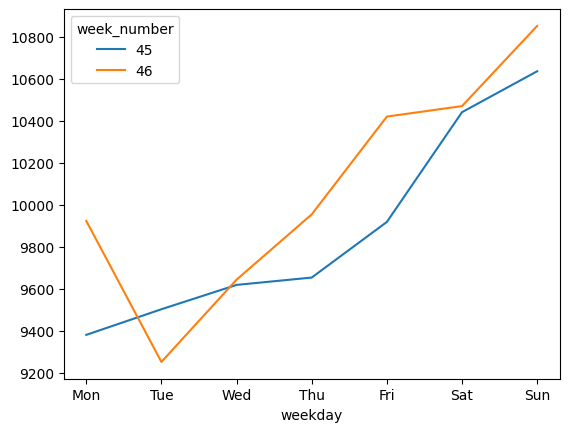

In [ ]:
import matplotlib.pyplot as plt

days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

date_week = unique_users_per_day['date_time'].apply(lambda x: pd.Series([x.strftime('%d/%m'), x.strftime('%a'), x.isocalendar()[1]]))
user_sums = unique_users_per_day['apple'] + unique_users_per_day['android']

weekly_mov = pd.concat([date_week, user_sums], axis=1)
weekly_mov.columns = ['date', 'weekday', 'week_number', 'total']
pivot_table = weekly_mov.pivot(index='weekday', columns='week_number', values='total')
pivot_table = pivot_table.reindex(days_order)

print('Day of the week influence:')
pivot_table.plot(grid=False)
plt.show()

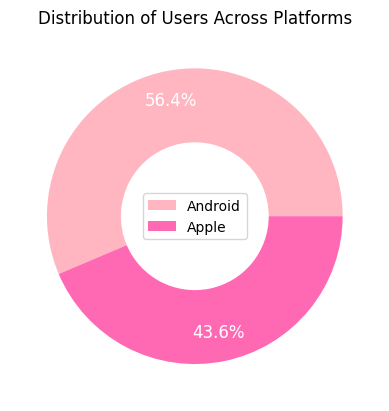

In [ ]:
# Importing the necessary libraries
import matplotlib.pyplot as plt

# Summing the number of android and apple users
android_users = unique_users_per_day['android'].mean()
apple_users = unique_users_per_day['apple'].mean()

# Extract data to a dictionary
data = {'Android': android_users, 'Apple': apple_users}

# Creating a color palette in different shades of pink
colors = ['lightpink', 'hotpink']

# Generating a donut plot 
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(data.values(), autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.5), pctdistance=0.8)

# Move the legend and autopct text inside the pie chart
plt.setp(autotexts, size=12, color='white')
ax.legend(wedges, data.keys(), loc='center')

plt.title('Distribution of Users Across Platforms')
plt.show()

In [ ]:
# Importing necessary package
import plotly.express as px
import statsmodels as sm
import pandas as pd

session_times = events.groupby(["session_skey", 'platform'])["date_time"].agg(['min', 'max', 'count']).reset_index()
session_times['session_length'] = (session_times['max'] - session_times['min']).dt.total_seconds()/60


fig = px.scatter(session_times, x='session_length', y='count', color='platform'
                , marginal_y='box'
                , marginal_x='box'
                , range_x=[0, 200]
                , range_y=[0, 200]
                , color_discrete_sequence = px.colors.qualitative.Pastel
                , title='Session length vs number of events per session'
                , labels={'session_length': 'Session Length (Minutes)', 'count': 'Events count'}
                , height=600, width=700
                )  
fig.update_layout(legend = dict(yanchor = "bottom", y = 0.8, xanchor = "right", x = 1))

fig.show()

session_lengths = events.groupby(['session_skey','user_skey', 'platform'])['date_time'].agg(['min', 'max']).reset_index() 
session_lengths['length_minutes'] = (session_lengths['max'] - session_lengths['min']).dt.total_seconds()/60 
print("In-app time spent in minutes: ") 
print(session_lengths.groupby('platform')['length_minutes'].agg(['mean', 'median','max', 'min', 'std']).round(3))

In-app time spent in minutes: 
           mean  median       max  min    std
platform                                     
android   3.589   1.316   162.161  0.0  6.547
apple     3.430   1.267  1403.762  0.0  9.270


The scatter plot indicates the relationship between the total events and the number of active days for each user. 

#### Session Length

- The standard deviation (a measure of the variability of a set of values) is higher for Android (314.96) compared to Apple (203.96). A higher standard deviation means that the number of daily unique users varies more from day to day on Android than on Apple. 

- The minimum and maximum number of daily unique users are also both higher on Android compared to Apple. 

- The proportion of users on Android and Apple platforms remain relatively consistent over time, with Android consistently having a higher proportion of users (around 56%) compared to Apple (around 44%).

- There does not seem to be any significant fluctuations or upward/downward trends in the proportions over the time period observed.

- The consistency in the proportion of users across different platforms suggests that user behavior and preferences remain stable over time. 

- The higher proportion of Android users indicates that the app is more popular among Android users. This could be due to various reasons such as user experience, app performance, and availability of features.

- The frequency of app usage varies widely within groups. Many users seem to interact with the app only over a few unique days, with a small number of total events. This may represent new users, occasional users, or users who have churned. Some users show a high number of total events despite being active for fewer days. These may be users who interact extensively with the app over short periods of time.

- The free trial period also should be taken into account, and analyzed under a different context.

#### Suggestions:

- While the current user base is more Android-heavy, it is also crucial to not overlook the Apple user base. Dedicating resources on both platforms could improve user experience and potentially draw in more users.

- Given the stable proportion of Android and Apple users, the development team could focus on improving the app’s features and performance on both platforms rather than prioritizing one over another.

- Running promotional campaigns or introducing new features could potentially shift the proportion and increase user base on both platforms. It would be helpful to monitor changes in the proportion, especially after making significant updates to the app.

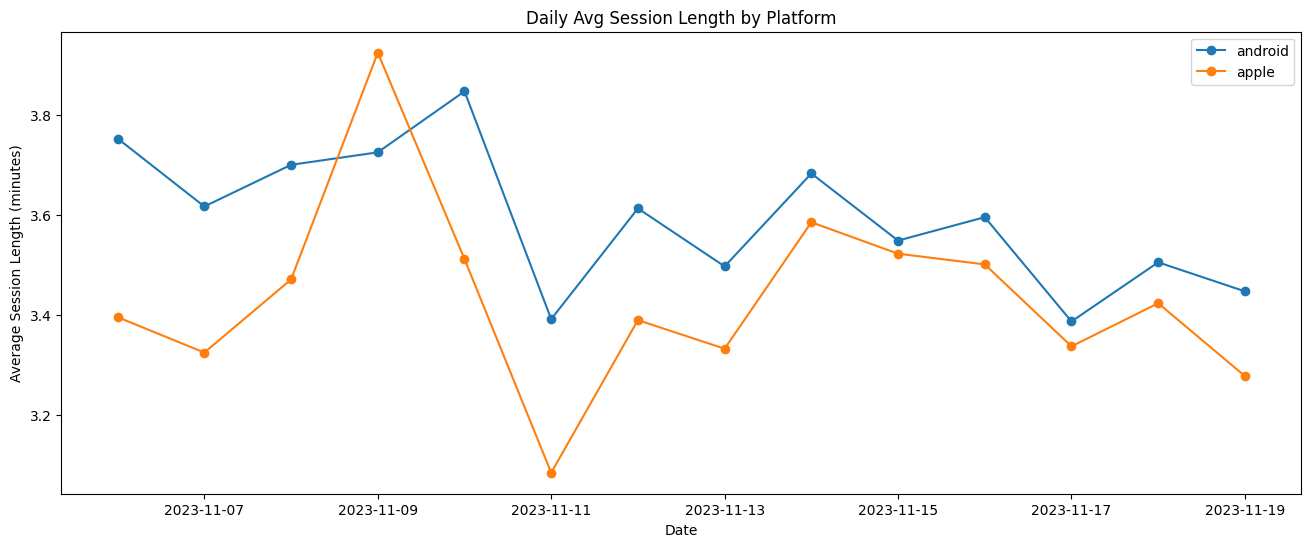

In [ ]:
session_lengths['min'] = pd.to_datetime(session_lengths['max'])
session_lengths.set_index('min', inplace=True)

session_length_by_day_android = session_lengths[session_lengths['platform']=='android'].resample('D').mean()
session_length_by_day_apple = session_lengths[session_lengths['platform']=='apple'].resample('D').mean()

session_length_by_day_android.reset_index(inplace=True)
session_length_by_day_apple.reset_index(inplace=True)
session_length_by_day_android.rename(columns={'min': 'date'}, inplace=True)  
session_length_by_day_apple.rename(columns={'min': 'date'}, inplace=True)  

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(session_length_by_day_android['date'], session_length_by_day_android['length_minutes'],
        marker='o', linestyle='-', label='android')
ax.plot(session_length_by_day_apple['date'], session_length_by_day_apple['length_minutes'],
        marker='o', linestyle='-', label='apple')

ax.set_xlabel("Date")
ax.set_ylabel("Average Session Length (minutes)")
ax.set_title("Daily Avg Session Length by Platform")
ax.legend()

plt.grid(False)
plt.show()

#### In-app time spent

1. **Distribution and Outliers**: High session lengths with a low amount of events could represent users who leave the app open without interacting with it, while low session lengths might indicate issues that cause users to leave the > app early. 
    > A feature could be introduced to confirm if the user is still active, or the app could automatically close or pause after a certain period of inactivity to save resources. 
    > If session lengths are consistently low for either platform, this suggests an issue that affects user experience. More in-depth user behavior analytics or user feedback could help identify any problem areas or bugs that need to be addressed.

2. **Compare Platforms**: If there are significant differences, this could highlight platform-specific issues or usage patterns.

3. **Trends Over Time**: Evaluate if there are any trends or changes in session length over time. This can provide insights into the impact of updates or changes to the app. 

4. **Correlation with Other Factors**: Analyze if session length correlates with other factors like particular events or sources of visitors.

5. The majority of sessions for both Android and Apple users are quite short, with most sessions being under 20 minutes. However, there are a significant number of outliers stretching as long as approximately 2900 minutes or about 48 hours. This suggests that majority of users engage with the app for short periods, but there are also users who keep the app open for extended periods, possibly even leaving it open in the background unintentionally.


#### Suggestions:

1. **Investigate High Session Lengths**: If there are users who have high session lengths with minimal events, the app could introduce a feature to confirm if the user is still active or to automatically pause/close after a certain period of inactivity. This could save server resources and offer a better user experience.

2. **Investigate Low Session Lengths**: If there are users who consistently have low session lengths, this could indicate a problem with the user experience. User feedback or further analysis could help identify any potential issues or bugs that need to be addressed.

3. **Observe Changes Over Time**: If there are noticeable changes in session length over time following updates or changes to the app, this could inform the impact and success of these changes. For example, if session length increases following a new feature launch, this could suggest the feature was well-received.

4. **Correlate outliers with user source**: If session length is consistently high or low for a specific user source, this could indicate an issue with user acquisition or retention.

5. **Correlation with Other Factors**: If session length correlates with specific events or visitor sources, this can inform user acquisition strategy. For example, if users coming from a certain source tend to have longer sessions, it might be worth investing more in that acquisition channel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2254e57f-f4d0-4158-b195-020957cbda5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>